# Overview of Exponential Smoothing methods

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simple Exponential Smoothing

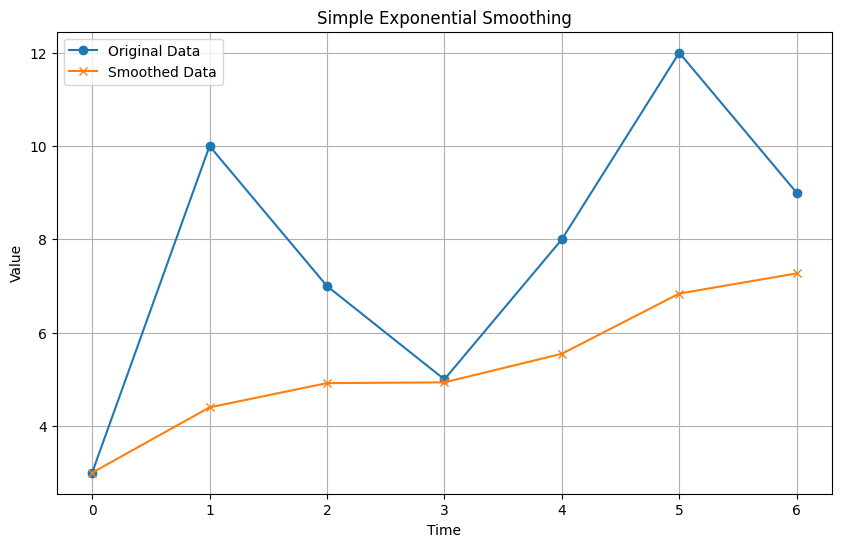

In [3]:
def simple_exponential_smoothing(data, alpha):
    smoothed_values = [data[0]]  # First value is the same
    for t in range(1, len(data)):
        smoothed_value = alpha * data[t] + (1 - alpha) * smoothed_values[t - 1]
        smoothed_values.append(smoothed_value)
    return pd.Series(smoothed_values, index=data.index if isinstance(data, pd.Series) else range(len(data)))

#Example
data = [3, 10, 7, 5, 8, 12, 9]  # Example time series data
alpha = 0.2  # Smoothing factor
smoothed_data = simple_exponential_smoothing(data, alpha)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data', marker='o')
plt.plot(smoothed_data, label='Smoothed Data', marker='x')
plt.title('Simple Exponential Smoothing')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# Holt's Exponential Smoothing

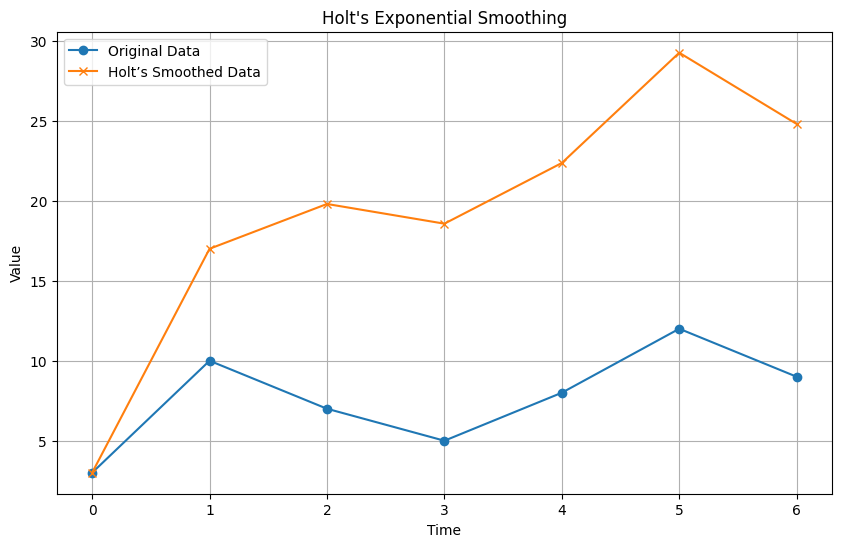

In [4]:
def holts_exponential_smoothing(data, alpha, beta):
    """
    Holt's Exponential Smoothing

    Parameters:
    data (list or pandas Series): The input time series data
    alpha (float): Smoothing factor for level (0 < alpha < 1)
    beta (float): Smoothing factor for trend (0 < beta < 1)

    Returns:
    pandas DataFrame: Smoothed values and trend
    """
    n = len(data)
    level = np.zeros(n)
    trend = np.zeros(n)
    
    # Initializing the first values
    level[0] = data[0]
    trend[0] = data[1] - data[0]  # Initial trend estimate

    for t in range(1, n):
        level[t] = alpha * data[t] + (1 - alpha) * (level[t - 1] + trend[t - 1])
        trend[t] = beta * (level[t] - level[t - 1]) + (1 - beta) * trend[t - 1]

    smoothed_values = level + trend * np.arange(n)
    return pd.DataFrame({'Level': level, 'Trend': trend, 'Smoothed': smoothed_values}, index=data.index if isinstance(data, pd.Series) else range(n))

# Example usage
data = [3, 10, 7, 5, 8, 12, 9]  # Example time series data
alpha = 0.8  # Smoothing factor for level
beta = 0.2   # Smoothing factor for trend
holt_data = holts_exponential_smoothing(data, alpha, beta)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data', marker='o')
plt.plot(holt_data['Smoothed'], label='Holt’s Smoothed Data', marker='x')
plt.title("Holt's Exponential Smoothing")
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# Holt-Winter Exponential Smoothing

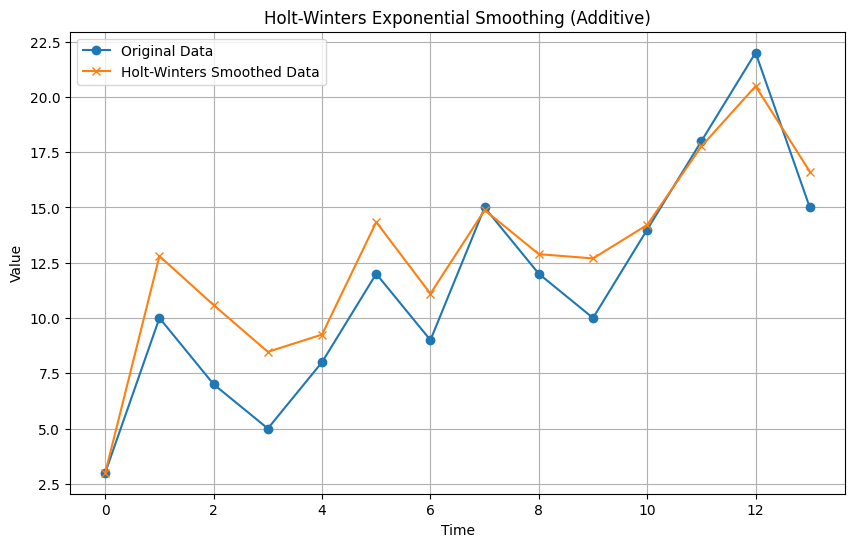

In [6]:
def holt_winters_exponential_smoothing(data, alpha, beta, gamma, season_length):
    """
    Holt-Winters Exponential Smoothing (Additive)

    Parameters:
    data (list or pandas Series): The input time series data
    alpha (float): Smoothing factor for level (0 < alpha < 1)
    beta (float): Smoothing factor for trend (0 < beta < 1)
    gamma (float): Smoothing factor for seasonality (0 < gamma < 1)
    season_length (int): The length of the seasonal cycle

    Returns:
    pandas DataFrame: Smoothed values, level, trend, and seasonal components
    """
    n = len(data)
    level = np.zeros(n)
    trend = np.zeros(n)
    seasonal = np.zeros(n)

    # Initializing the first values
    level[0] = data[0]
    trend[0] = data[1] - data[0]
    
    # Initializing seasonal components
    for s in range(season_length):
        seasonal[s] = data[s] - level[0]  # Initial seasonal components

    for t in range(1, n):
        if t >= season_length:
            seasonal[t] = gamma * (data[t] - level[t - 1]) + (1 - gamma) * seasonal[t - season_length]

        level[t] = alpha * (data[t] - seasonal[t]) + (1 - alpha) * (level[t - 1] + trend[t - 1])
        trend[t] = beta * (level[t] - level[t - 1]) + (1 - beta) * trend[t - 1]

    smoothed_values = level + seasonal
    return pd.DataFrame({'Level': level, 'Trend': trend, 'Seasonal': seasonal, 'Smoothed': smoothed_values}, index=data.index if isinstance(data, pd.Series) else range(n))

# Example usage
data = [3, 10, 7, 5, 8, 12, 9, 15, 12, 10, 14, 18, 22, 15]  # Example time series data with seasonality
alpha = 0.6  # Smoothing factor for level
beta = 0.2   # Smoothing factor for trend
gamma = 0.4  # Smoothing factor for seasonality
season_length = 4  # Seasonal length (e.g., quarterly data)
holt_winters_data = holt_winters_exponential_smoothing(data, alpha, beta, gamma, season_length)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data', marker='o')
plt.plot(holt_winters_data['Smoothed'], label='Holt-Winters Smoothed Data', marker='x')
plt.title("Holt-Winters Exponential Smoothing (Additive)")
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()
